# TELECOM CHURN CASE STUDY

### Problem Statement: 
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Retaining high profitable customers is the main business goal here.


#### Understanding the business objective and the data

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Steps performed are :
1) Understanding Data <br>
2) Exploratory Data Analysis <br>
3) Data Preparation <br>
4) Model Building <br>
5) Model Evaluation <br>

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Importing the data-set

In [2]:
df= pd.read_csv('telecom_churn_data.csv')

Reading the Telecom Churn data from the CSV file

In [3]:
## First 5 rows of the data
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
## checking the dimension of the data
df.shape

(99999, 226)

#### The telecom data contains 99999 rows and 226 columns

In [5]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

## EDA


In [7]:
### checking the unique values and dropping columns with value as 1
unique_1_col=[]
for i in df.columns:
    if df[i].nunique()==1:
        unique_1_col.append(i)
    else:
        pass
df.drop(unique_1_col,axis=1,inplace=True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [8]:
df.shape

(99999, 210)

After Checking the shape of the dataset we get 99999 rows and 210 columns


In [9]:
#Converting into percentage with 2 decimal points
(df.isnull().sum()*100/df.shape[0]).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

In [10]:
date_col= df.select_dtypes(include=['object'])
print('\n These are the columns available with datetime format represented as object\n', date_col.columns)

# converting the selected columns to datetime format
for i in date_col.columns:
    df[i]= pd.to_datetime(df[i])


 These are the columns available with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [11]:
## confirming the conversion
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

### Handling the missing value

In [12]:
## missing values of 'data recharge' attribute
df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0


In [13]:
#Handling 'total_rech_data' and 'max_rech_data' for month 6
df['total_rech_data_6']= df['total_rech_data_6'].replace(np.NaN,0.0)
df['total_rech_data_7']= df['total_rech_data_7'].replace(np.NaN,0.0)
df['total_rech_data_8']= df['total_rech_data_8'].replace(np.NaN,0.0)
df['total_rech_data_9']= df['total_rech_data_9'].replace(np.NaN,0.0)

In [14]:
#Handling 'max_rech_data'
df['max_rech_data_6']= df['max_rech_data_6'].replace(np.NaN,0.0)
df['max_rech_data_7']= df['max_rech_data_7'].replace(np.NaN,0.0)
df['max_rech_data_8']= df['max_rech_data_8'].replace(np.NaN,0.0)
df['max_rech_data_9']= df['max_rech_data_9'].replace(np.NaN,0.0)

In [15]:
#Handling the missing values for the attributes count_rech_2g_*,count_rech_3g_* for month 6,7,8 and 9
df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head()

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0


In [16]:
df[['total_rech_data_6','count_rech_2g_6','count_rech_3g_6']].corr()

,total_rech_data_6,count_rech_2g_6,count_rech_3g_6
total_rech_data_6,1.000000,0.890060,0.393467
count_rech_2g_6,0.890060,1.000000,-0.068864
count_rech_3g_6,0.393467,-0.068864,1.000000


In [17]:
## as we can see from the above that count_rech_2g and count_rech_3g for each months 6,7,8,9 are highly corelated,hence we can remove this columns
# dropping count_rech_2g and count_rech_3g of each month
df.drop(['count_rech_2g_6','count_rech_3g_6',
        'count_rech_2g_7','count_rech_3g_7',
        'count_rech_2g_8','count_rech_3g_8',
        'count_rech_2g_9','count_rech_3g_9'],axis=1,inplace=True)

In [18]:
df.shape

(99999, 202)

Now the number of columns are reduced after handling the missing values


In [19]:
#Handling the missing values for the attributes *arpu_3g_* arpu_2g_ for months 6,7,8,9
df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head()

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0


In [20]:
## checking the correlation of the above columns for each month
print('Correlation for month 6\n\n',df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print('\nCorrelation for month 7\n\n',df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print('\nCorrelation for month 8\n\n',df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print('\nCorrelation for month 9\n\n',df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())


Correlation for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9            0.852253   1.00000

##### As we can see arpu_2g_* and arpu_3g_* for each month from 6 to 9 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 9 respectively.
##### considering the high correlation, it is better to drop these columns.

In [21]:
# dropping the above columns
df.drop(['arpu_3g_6','arpu_2g_6',
        'arpu_3g_7','arpu_2g_7',
        'arpu_3g_8','arpu_2g_8',
        'arpu_3g_9','arpu_2g_9'],axis=1,inplace=True)

In [22]:
df.shape

(99999, 194)

### dropping the columns with high missing value percentage

In [23]:
# columns night_pck_user and fb_user has missing value more than 50% from months 6-9 respectively, hence we can drop them.
df.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
        'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],axis=1,inplace=True)

In [24]:
df.shape

(99999, 186)

After dropping the columns with high value percentage we get 186 columns and 99999 rows

In [25]:
# Handling missing value for av_rech_amt_data for months 6-9  
df[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


#### From the above table it can be observed that the av_rech_amt_data from 6-9 months can be replaced
#### with 0 respectively where the total_rech_data from 6-9 months is 0 i-e if the total_rech_data done is 0 then the
#### avg_rech_amt_data would also be 0.

### Now , Imputing avg_rech_amt_data with 0

In [26]:
df['av_rech_amt_data_6']= df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7']= df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8']= df['av_rech_amt_data_8'].replace(np.NaN,0.0)
df['av_rech_amt_data_9']= df['av_rech_amt_data_9'].replace(np.NaN,0.0)

In [27]:
(df.isnull().sum()*100/df.shape[0]).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
loc_og_t2f_mou_9             7.75
loc_og_t2t_mou_9             7.75
loc_ic_t2f_mou_9             7.75
std_ic_mou_9                 7.75
std_og_t2f_mou_9             7.75
loc_og_t2m_mou_9             7.75
loc_ic_mou_9                 7.75
std_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
std_ic_t2t_mou_9             7.75
loc_og_t2c_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_og_t2t_mou_9             7.75
loc_og_mou_9                 7.75
std_og_mou_9                 7.75
spl_ic_mou_9                 7.75
roam_og_mou_9                7.75
spl_og_mou_9                 7.75
loc_ic_t2t_mou_9             7.75
isd_og_mou_9                 7.75
roam_ic_mou_9                7.75
loc_ic_t2m_mou_9             7.75
isd_ic_mou_9                 7.75
onnet_mou_9                  7.75
ic_others_9   

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


As we conclude from above that the date_of_last_rech_data of months 6,7,8 and 9 are of no use after 
imputation of columns total_rech_data_*, max_rech_data_*,
Also the missing values are high of these columns, so we can drop this columns.

In [29]:
df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7',
        'date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1,inplace=True)

As we can no longer use date_of_last_rech_data , we can drop datetime column date_of_last_rech for 6-9 months

In [30]:
df.drop(['date_of_last_rech_6','date_of_last_rech_7',
        'date_of_last_rech_8','date_of_last_rech_9'], axis=1, inplace=True)

In [31]:
df.shape

(99999, 178)

### Filtering High Value customer

 Filtering the data based on revenue generated
 Getting total recharge amount done, we have total_rech_data

In [32]:
# calculating the total_amt_rech_data for the month of 6,7,8 and 9
df['total_amt_rech_data_6']= df['av_rech_amt_data_6']* df['total_rech_data_6']
df['total_amt_rech_data_7']= df['av_rech_amt_data_7']* df['total_rech_data_7']

# calculating the overall recharge done for months 6,7
df['Overall_rech_amt_data_6']= df['total_amt_rech_data_6']+df['total_rech_amt_6']
df['Overall_rech_amt_data_7']= df['total_amt_rech_data_7']+df['total_rech_amt_7']

# calculating the avg recharge done in months 6 and 7
df['av_amt_rech_6_7']= (df['Overall_rech_amt_data_6']+ df['Overall_rech_amt_data_7'])/2

In [33]:
# finding the 70th percentile in the overall revenue to find the high value customers
cut_off= df['av_amt_rech_6_7'].quantile(0.70)
print('\nThe 70th quantile value to determine the High value customer:', cut_off,'\n')


The 70th quantile value to determine the High value customer: 478.0 



In [34]:
# filtering the data to the top 30% considered as High value customer
df= df[df['av_amt_rech_6_7']>= cut_off]

In [35]:
df.shape

(30001, 183)

#### After filtering High value customer now we can see the total number of customer is ~30k

In [36]:
# Checking null percentage for HVC
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9           6.34
spl_og_mou_9               6.34
loc_og_t2m_mou_9           6.34
loc_og_t2f_mou_9           6.34
loc_ic_t2t_mou_9           6.34
isd_og_mou_9               6.34
loc_og_t2t_mou_9           6.34
loc_ic_t2m_mou_9           6.34
std_og_t2t_mou_9           6.34
roam_og_mou_9              6.34
std_og_mou_9               6.34
loc_ic_mou_9               6.34
std_ic_t2t_mou_9           6.34
roam_ic_mou_9              6.34
loc_og_t2c_mou_9           6.34
std_ic_t2m_mou_9           6.34
offnet_mou_9               6.34
std_ic_t2f_mou_9           6.34
std_og_t2f_mou_9           6.34
std_ic_mou_9               6.34
onnet_mou_9                6.34
spl_ic_mou_9               6.34
loc_og_mou_9               6.34
isd_ic_mou_9               6.34
std_og_t2m_mou_9           6.34
ic_others_9                6.34
og_others_9                6.34
std_og_mou_8               3.91
isd_og_mou_8               3.91
std_og_t2f_mou_8           3.91
std_ic_t2t_mou_8           3.91
og_other

#### Handling the above null values using KNN Imputer and scaling the data using MinMaxScaler


In [37]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [38]:
# numeric columns
num_col= df.select_dtypes(include=['int64','float']).columns.tolist()

In [39]:
scaler= MinMaxScaler()
df[num_col]= scaler.fit_transform(df[num_col])

In [40]:
# KNN imputing
knn= KNNImputer(n_neighbors=3)
df_knn= pd.DataFrame(knn.fit_transform(df[num_col]))
df_knn.columns= df[num_col].columns

In [41]:
df_knn.isnull().sum().sum()

0

In [42]:
# KNN imputer has imputed all the nan values
# converting the scaled data back to original form
df[num_col]= scaler.inverse_transform(df_knn)
df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_data_6,total_amt_rech_data_7,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.00,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,

In [43]:
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number              0.0
isd_ic_mou_8               0.0
ic_others_6                0.0
ic_others_7                0.0
ic_others_8                0.0
ic_others_9                0.0
total_rech_num_6           0.0
total_rech_num_7           0.0
total_rech_num_8           0.0
total_rech_num_9           0.0
total_rech_amt_6           0.0
total_rech_amt_7           0.0
total_rech_amt_8           0.0
total_rech_amt_9           0.0
max_rech_amt_6             0.0
max_rech_amt_7             0.0
max_rech_amt_8             0.0
max_rech_amt_9             0.0
last_day_rch_amt_6         0.0
last_day_rch_amt_7         0.0
last_day_rch_amt_8         0.0
isd_ic_mou_9               0.0
isd_ic_mou_7               0.0
total_rech_data_6          0.0
isd_ic_mou_6               0.0
std_ic_t2m_mou_7           0.0
std_ic_t2m_mou_8           0.0
std_ic_t2m_mou_9           0.0
std_ic_t2f_mou_6           0.0
std_ic_t2f_mou_7           0.0
std_ic_t2f_mou_8           0.0
std_ic_t2f_mou_9           0.0
std_ic_m

In [44]:
df.isnull().sum().sum()

0

#### As seen from above now there are no null values present in the data set

### Defining Churn variable

Deriving churn value based on the usage for this model.
For that deriving churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,and vol_2g_mb_9 attributes 

In [45]:
churn_col= ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [46]:
# Initializing the churn variable
df['churn']=0

#imputing the churn values based on the condition
df['churn']= np.where(df[churn_col].sum(axis=1)== 0,1,0)

In [47]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_data_6,total_amt_rech_data_7,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.0,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.7

0    0.918636
1    0.081364
Name: churn, dtype: float64


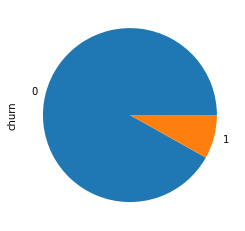

In [48]:
# finding churn/non churn percentage
print(df['churn'].value_counts(normalize=True))
(df['churn'].value_counts(normalize=True)).plot(kind='pie')
plt.show()

## As seen from above 91% of the cutomers are not churn, it is possibility of class imbalance

since churn variable is the target variable, columns relating to this variable (suffic _9) can be dropped from the data set

In [49]:
# selecting the churn phase columns
churn_phase_col= [col for col in df.columns if '_9' in col]
print('\nThe columns from churn_phase_col are :\n', churn_phase_col)


The columns from churn_phase_col are :
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [50]:
#dropping columns relating to (-9)
df.drop(churn_phase_col,axis=1,inplace= True)

In [51]:
# checking the dimension of the data set after dropping the above column
df.shape

(30001, 141)

In [52]:
# dropping the new derived columns in good phase
df.drop(['total_amt_rech_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_amt_rech_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'],axis=1,inplace=True)

In [53]:
df.shape

(30001, 133)

In [54]:
# creating a list of column name for each month
mon_6_col= [col for col in df.columns if '_6'in col]
mon_7_col= [col for col in df.columns if '_7'in col]
mon_8_col= [col for col in df.columns if '_8'in col]

In [55]:
# checking the correlation amongst the independent variable, then dropping the highly correlated variables
df_corr= df.corr()
df_corr.loc[:,:]= np.tril(df_corr,k=-1)
df_corr=df_corr.stack()
df_corr
df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                     0.955351
isd_og_mou_8        isd_og_mou_7               0.943433
                    isd_og_mou_6               0.919641
isd_og_mou_7        isd_og_mou_6               0.916237
sachet_2g_8         total_rech_data_8          0.900629
total_ic_mou_6      loc_ic_mou_6               0.895099
total_ic_mou_8      loc_ic_mou_8               0.893072
total_ic_mou_7      loc_ic_mou_7               0.883070
std_og_t2t_mou_8    onnet_mou_8                0.860483
std_og_t2t_mou_7    onnet_mou_7                0.860275
std_og_t2t_mou_6    onnet_mou_6                0.859593
av_amt_rech_6_7     Overall_rech_amt_data_7    0.856275
std_og_t2m_mou_7    offnet_mou_7               0.854685
std_og_t2m_mou_8    offnet_mou_8               0.851049
total_og_mou_8      std_og_mou_8               0.848858
total_og_mou_7      std_og_mou_7               0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8           0.847512
std_ic_mou_8        std_ic_t2m_mou_8           0

In [56]:
col_to_drop= ['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8',
             'total_ic_mou_6','total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_8',
             'std_og_t2t_mou_7','std_og_t2t_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8']
# These columns can be dropped since they are highly correlated with predicted variables
# criteria set for collinearity is 85%

# dropping the columns
df.drop(col_to_drop,axis=1,inplace=True)

In [57]:
df.shape

(30001, 121)

In [58]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.000000,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,90.0,154.0,30.0,50.0,0.0,10.0,3.0,0.0,154.0,23.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.00,43

### Deriving new variable to understand the data

In [59]:
# using variable 'aon'
# creating new variable called tenure

df['tenure']= (df['aon']/30).round(0)

# we derived a new column, now we can drop the previous column 'aon'
df.drop('aon', axis=1,inplace=True)

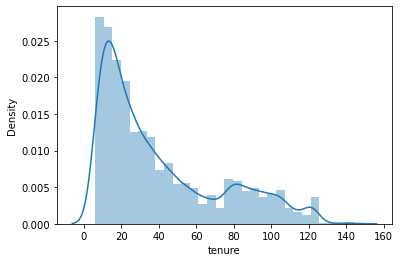

In [60]:
# checking the distribution of variable tenure

sns.distplot(df.tenure,bins=30)
plt.show()

In [61]:
tn_range= [0,6,12,24,60,61]
tn_labels= ['0-6Months','6-12Months','1-2yrs','2-5yrs','5 yrs above']
df['tenure_range']= pd.cut(df['tenure'],tn_range , labels= tn_labels)
df['tenure_range'].head()

0         2-5yrs
7         2-5yrs
8     6-12Months
21        1-2yrs
23        1-2yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6Months' < '6-12Months' < '1-2yrs' < '2-5yrs' < '5 yrs above']

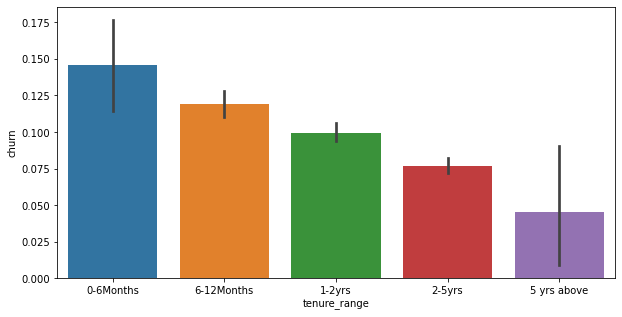

In [62]:
#plotting a bar graph
plt.figure(figsize=(10,5))
sns.barplot(x='tenure_range',y= 'churn',data= df)
plt.show()

 It can be observed from the above graph that maximum rate of churn is happening in 0-6 months phase,
    gradually it decrease if a customer stays with the same network for a long time

The average revenue per user is given by arpu_6 and arpu_7 in two separate column,
hence they both can be combined to 1 new column and drop the other column

In [63]:
df['avg_arpu_6_7']= (df['arpu_6']+df['arpu_7'])/2
df['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [64]:
# Dropping the original columns
df.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

In [65]:
df.shape

(30001, 121)

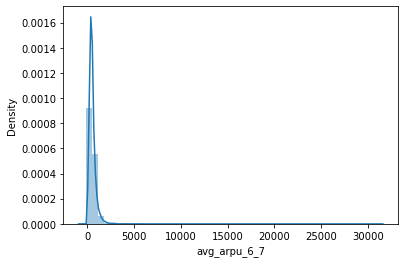

In [66]:
# visualisng the column created
sns.distplot(df['avg_arpu_6_7'])
plt.show()

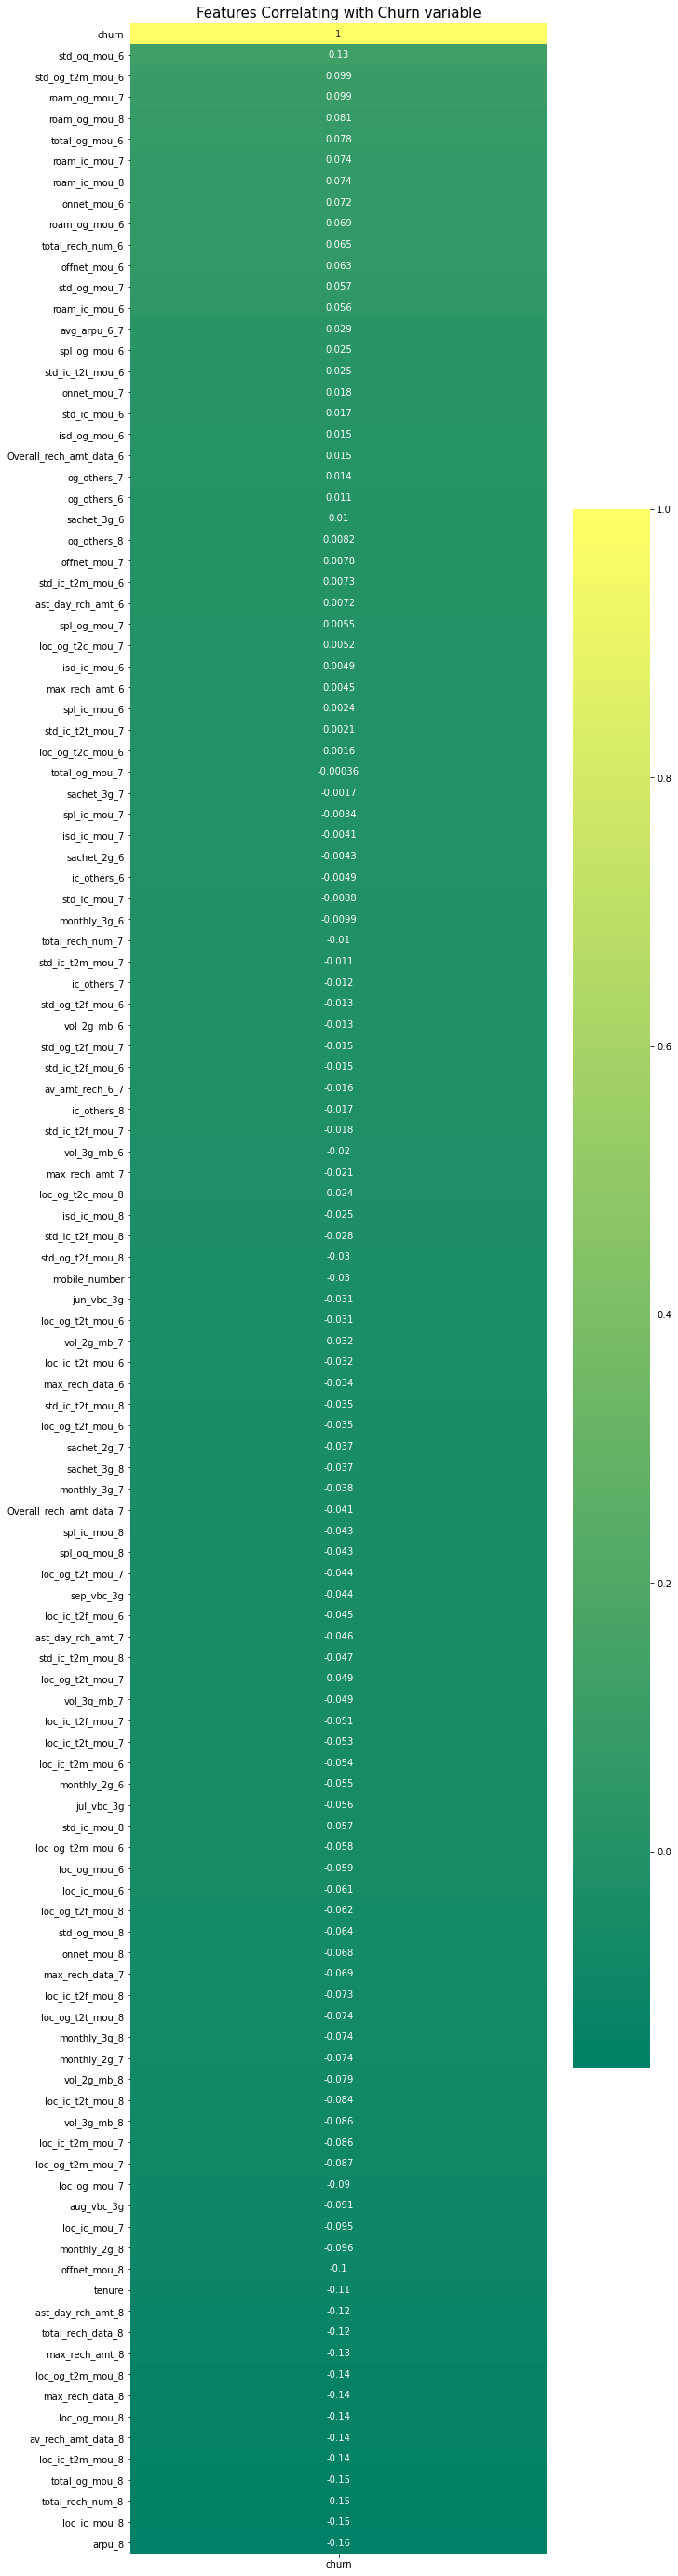

In [67]:
# checking correlation between target variable(sale price) with other variable in dataset
plt.figure(figsize=(10,50))
heatmap_churn= sns.heatmap(df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, cmap='summer')
heatmap_churn.set_title('Features Correlating with Churn variable', fontsize= 15)
plt.show()

 Average outgoing calls & calls on roaming for 6th and 7th months has a positive correlation with churn,
 whereas Avg Revenue, no of recharge for 8th month has negative correlation

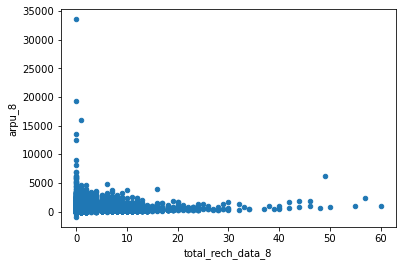

In [68]:
# visualisng total recharge and avg recharge for 8th month
df[['total_rech_data_8','arpu_8']].plot.scatter(x='total_rech_data_8', y='arpu_8')
plt.show()

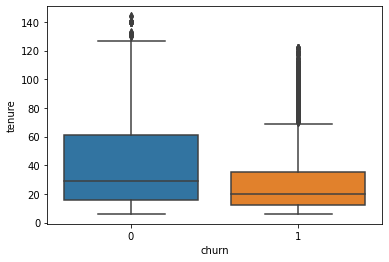

In [69]:
sns.boxplot(x=df.churn,y= df.tenure)
plt.show()

From the above plot it is observed that tenured customer do not churn and they keep availing the services

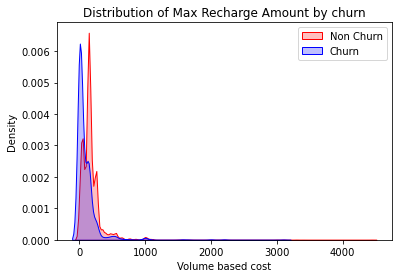

In [70]:
# Plot between churn vs max rechare amount
ax= sns.kdeplot(df.max_rech_amt_8[(df['churn']== 0)], color='Red', shade= True)
ax= sns.kdeplot(df.max_rech_amt_8[(df['churn']== 1)], color='Blue', shade= True)
ax.legend(['Non Churn','Churn'],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()           

Customers who recharge more amount are less likely to churn

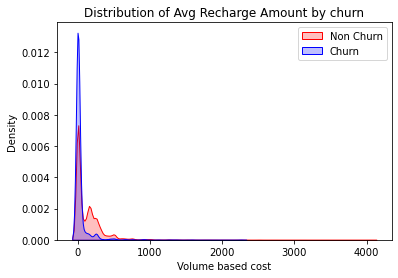

In [71]:
# plot between churn vc av_rech_amt_data_8
ax= sns.kdeplot(df.av_rech_amt_data_8[(df['churn']== 0)],color= 'Red',shade= True)
ax= sns.kdeplot(df.av_rech_amt_data_8[(df['churn']== 1)], ax=ax ,color='Blue', shade= True)
ax.legend(['Non Churn','Churn'],loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Avg Recharge Amount by churn')
plt.show()

In [72]:
# creating categories for month 8 column total recharge and their count
df['total_rech_data_group_8']= pd.cut(df['total_rech_data_8'],[-1,0,10,25,100], labels=['No Recharge','<=10_Recharges','10-25_Recharges','>25_Recharges'])
df['total_rech_num_group_8']= pd.cut(df['total_rech_num_8'],[-1,0,10,25,100], labels=['No Recharge','<=10_Recharges','10-25_Recharges','>25_Recharges'])


Distribution of total_rech_data_group_8 variable
 <=10_Recharges     15307
No Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


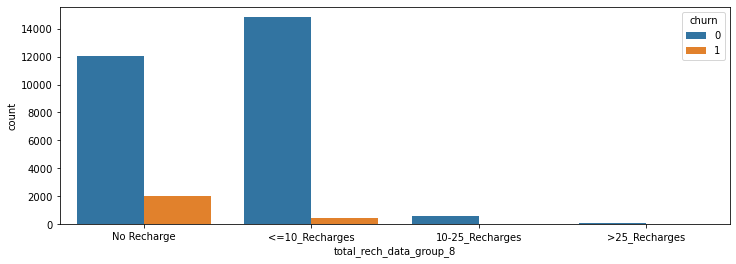

Distribution of total_rech_num_group_8 variable
 <=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1988
No Recharge          583
Name: total_rech_num_group_8, dtype: int64


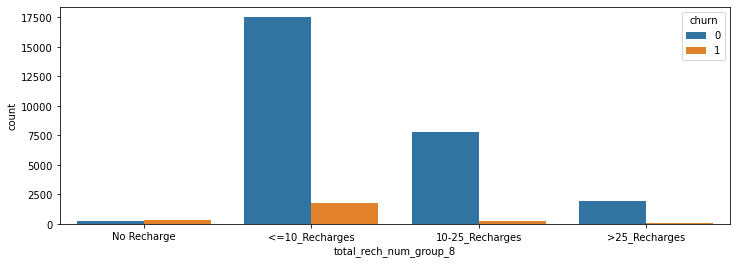

In [73]:
#plotting the above columns
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='total_rech_data_group_8',hue='churn')
print('Distribution of total_rech_data_group_8 variable\n', df['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='total_rech_num_group_8',hue='churn')
print('Distribution of total_rech_num_group_8 variable\n', df['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases.

In [74]:
# Creating dummy variables for some categorical variables and dropping the first one
dummy= pd.get_dummies(df[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']],drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12Months,tenure_range_1-2yrs,tenure_range_2-5yrs,tenure_range_5 yrs above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [75]:
# adding the results to master data
df= pd.concat([df,dummy],axis=1)
df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12Months,tenure_range_1-2yrs,tenure_range_2-5yrs,tenure_range_5 yrs above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5yrs,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5yrs,1209.5150,No Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.2

In [76]:
# creating a copy of data set
df_1= df[:].copy()

# dropping unwanted columns
df_1.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'],axis=1,inplace=True)

In [77]:
df_1.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12Months,tenure_range_1-2yrs,tenure_range_2-5yrs,tenure_range_5 yrs above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.66

In [78]:
df_1.shape

(30001, 127)

#### Creating X and Y Variables for model building

In [79]:
# Creating X and y variable for model building
X= df_1.drop(['churn'], axis=1)

In [80]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12Months,tenure_range_1-2yrs,tenure_range_2-5yrs,tenure_range_5 yrs above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,

In [81]:
y= df_1['churn']

In [82]:
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [83]:
# Splitting the dataset into train test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=100)


In [84]:
print('The dimension of X_train is :',X_train.shape)
print('The dimension of X_test is :',X_test.shape)

The dimension of X_train is : (21000, 126)
The dimension of X_test is : (9001, 126)


In [85]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 39186 to 18732
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [86]:
num_col= X_train.select_dtypes(include=['int64','float64']).columns.tolist()

In [87]:
# applying scaling to the numeric columns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

X_train[num_col]= scaler.fit_transform(X_train[num_col])

In [88]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12Months,tenure_range_1-2yrs,tenure_range_2-5yrs,tenure_range_5 yrs above
39186,0.027671,0.000771,0.001015,0.000450,0.018164,0.016449,0.007001,0.011185,0.006991,0.010734,0.001939,0.005114,0.001847,0.000838,0.001032,0.000450,0.004573,0.006710,0.003993,0.000812,0.000000,0.000000,0.0,0.011234,0.003127,0.002652,0.005075,0.002234,0.000314,0.000000,0.000000,0.000000,0.000309,0.000996,0.000948,0.02044,0.000000,0.006755,0.001403,0.00000,0.0,0.0,0.014190,0.013454,0.006625,0.003504,0.008845,0.011518,0.028578,0.033796,0.022729,0.004278,0.004912,0.001372,0.021011,0.032866,0.028548,0.000000,0.000000,0.000000,0.003767,0.009489,0.010195,0.000000,0.000000,0.000000,0.003194,0.004882,0.009662,0.000000,0.0,0.0,0.038149,0.028535,0.016077,0.000000,0.001344,0.000000,0.058824,0.041667,0.015306,0.099252,0.114464,0.051472,0.099252,0.008728,0.044954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.026857,0.015907,0.019003,0.054309,0,0,0,1,0,0,0,0,0,0
39833,0.020929,0.019642,0.006110,0.003786,0.038403,0.023547,0.018948,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010023,0.004269,0.003786,0.058659,0.039398,0.042642,0.008281,0.004330,0.058713,0.0,0.028980,0.000000,0.033266,0.028773,0.025981,0.003793,0.000000,0.012449,0.000000,0.013279,0.004173,0.001380,0.00000,0.000000,0.013043,0.000000,0.00000,0.0,0.0,0.043661,0.024415,0.021799,0.006286,0.005387,0.009158,0.030649,0.049006,0.052150,0.054730,0.028911,0.008643,0.035302,0.050052,0.054291,0.002863,0.002415,0.000000,0.006280,0.008354,0.003946,0.026260,0.003433,0.000000,0.014688,0.006954,0.003740,0.000000,0.0,0.0,0.007663,0.002264,0.001643,0.005252,0.000922,0.000149,0.058824,0.058333,0.025510,0.027431,0.029925,0.029220,0.027431,0.024439,0.029220,0.016667,0.063023,0.063023,0.063023,0.024132,0.001301,0.021199,0.030489,0.007547,0.005118,0.005702,0.00,0.0,0.0,0.047619,0.062500,0.0,0.0,0.0,0.0,0.0,0.0,0.014253,0.016099,0.024627,0.017554,0.014926,0.011385,0.036

In [89]:
#Data imbalance handling 
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42)
X_train_sm,y_train_sm= sm.fit_resample(X_train,y_train)

In [90]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38618, 126)
Dimension of y_train_sm Shape: (38618,)


### Model building , Logistic Regression

In [91]:
#importing libraries
import statsmodels.api as sm

In [92]:
#Logistic regression model

logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38492
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14310.
Date:                Tue, 17 Jan 2023   Deviance:                       28621.
Time:                        17:53:15   Pearson chi2:                 1.78e+12
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.8714      0.152      5.715      0.000       0.573       1.170
arpu_8                                     -3.2041      3.524     -0.909      0.363     -10.111       3.702
onnet_mou_6                              -106.2013     23.234     -4.571      0.000    -151.739     -60.664
onnet_mou_7                               -12.2497     17.629     -0.695      0.487     -46.802      22.302
onnet_mou_8                               121.3313     26.115      4.646      0.000      70.146     172.516
offnet_mou_6                             -110.9720     26.139     -4.245      0.000    -162.203     -59.741
offnet_mou_7                              -11.4781     20.861     -0.550      0.582     -52.365      29.409
offnet_mou_8                              152.3082     33.985      4.482      0.000      85.699     218.917
roam_ic_mou_6                               1.5384      0.858      1.792      0.073      -0.144       3.221
roam_ic_mou_7                               2.9730      1.278      2.326      0.020       0.468       5.478
roam_ic_mou_8                              -1.6031      0.721     -2.223      0.026      -3.017      -0.190
roam_og_mou_6                              41.6280      9.934      4.191      0.000      22.158      61.098
roam_og_mou_7                               8.1416      6.093      1.336      0.181      -3.801      20.084
roam_og_mou_8                             -55.7779     12.956     -4.305      0.000     -81.171     -30.384
loc_og_t2t_mou_6                        -2.265e+04   1.94e+04     -1.170      0.242   -6.06e+04    1.53e+04
loc_og_t2t_mou_7                        -2.403e+04   2.15e+04     -1.117      0.264   -6.62e+04    1.82e+04
loc_og_t2t_mou_8                         2.589e+05   3.39e+04      7.631      0.000    1.92e+05    3.25e+05
loc_og_t2m_mou_6                        -1.666e+04   1.42e+04     -1.170      0.242   -4.46e+04    1.12e+04
loc_og_t2m_mou_7                         -1.53e+04   1.37e+04     -1.117      0.264   -4.21e+04    1.15e+04
loc_og_t2m_mou_8                         1.195e+05   1.57e+04      7.631      0.000    8.88e+04     1.5e+05
loc_og_t2f_mou_6                        -5166.6861   4413.075     -1.171      0.242   -1.38e+04    3482.782
loc_og_t2f_mou_7                        -4016.6909   3595.281     -1.117      0.264   -1.11e+04    3029.931
loc_og_t2f_mou_8                         1.417e+04   1856.682      7.632      0.000    1.05e+04    1.78e+04
loc_og_t2c_mou_6                           -5.3621      1.054     -5.086      0.000      -7.428      -3.296
loc_og_t2c_mou_7                           -2.2010      1.803     -1.221      0.222      -5.735       1.333
loc_og_t2c_mou_8                            2.7330      1.2

## Logistic regression using RFE

In [93]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

from sklearn.feature_selection import RFE

#running rfe with 20 features
rfe= RFE(logreg, n_features_to_select= 20)
rfe= rfe.fit(X_train_sm,y_train_sm)

In [94]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [95]:
rfe_columns= X_train_sm.columns[rfe.support_]

In [96]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 35),
 ('onnet_mou_7', False, 3),
 ('onnet_mou_8', False, 34),
 ('offnet_mou_6', False, 36),
 ('offnet_mou_7', False, 4),
 ('offnet_mou_8', False, 11),
 ('roam_ic_mou_6', False, 60),
 ('roam_ic_mou_7', False, 21),
 ('roam_ic_mou_8', False, 75),
 ('roam_og_mou_6', False, 64),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 9),
 ('loc_og_t2t_mou_6', False, 106),
 ('loc_og_t2t_mou_7', False, 38),
 ('loc_og_t2t_mou_8', False, 32),
 ('loc_og_t2m_mou_6', False, 66),
 ('loc_og_t2m_mou_7', False, 65),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 102),
 ('loc_og_t2f_mou_7', False, 93),
 ('loc_og_t2f_mou_8', False, 43),
 ('loc_og_t2c_mou_6', False, 12),
 ('loc_og_t2c_mou_7', False, 62),
 ('loc_og_t2c_mou_8', False, 58),
 ('loc_og_mou_6', False, 88),
 ('loc_og_mou_7', False, 83),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 98),
 ('std_og_t2f_mou_6', False, 105),
 ('std_og_t2f_mou_7', False, 74),
 ('std_og_t2f_mou_8'

In [97]:
# Assessing the model
X_train_SM= sm.add_constant(X_train_sm[rfe_columns])
logm2= sm.GLM(y_train_sm,X_train_SM, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16084.
Date:                Tue, 17 Jan 2023   Deviance:                       32168.
Time:                        17:55:44   Pearson chi2:                 6.37e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9410      0.070     13.526      0.000       0.805       1.077
arpu_8               -26.9058      2.886     -9.322      0.000     -32.563     -21.249
roam_og_mou_7          5.5529      0.445     12.482      0.000       4.681       6.425
loc_og_t2m_mou_8      -5.8935      0.926     -6.364      0.000      -7.708      -4.079
std_og_mou_7           8.6584      0.500     17.332      0.000       7.679       9.637
total_og_mou_8       -20.2640      0.902    -22.470      0.000     -22.031     -18.496
loc_ic_t2t_mou_8    1.731e+05   1.05e+04     16.411      0.000    1.52e+05    1.94e+05
loc_ic_t2m_mou_6       7.6790      0.607     12.649      0.000       6.489       8.869
loc_ic_t2m_mou_8    2.008e+05   1.22e+04     16.410      0.000    1.77e+05    2.25e+05
loc_ic_t2f_mou_8    6.868e+04   4185.740     16.409      0.000    6.05e+04    7.69e+04
loc_ic_mou_8        -2.33e+05   1.42e+04    -16.412      0.000   -2.61e+05   -2.05e+05
std_ic_mou_8          -9.5184      1.294     -7.356      0.000     -12.055      -6.982
spl_ic_mou_8         -10.2992      1.174     -8.771      0.000     -12.601      -7.998
total_rech_num_8      -7.2428      0.536    -13.515      0.000      -8.293      -6.192
last_day_rch_amt_8   -12.1798      0.701    -17.372      0.000     -13.554     -10.806
total_rech_data_8    -11.1265      0.586    -19.003      0.000     -12.274      -9.979
max_rech_data_8       -2.5334      0.312     -8.124      0.000      -3.145      -1.922
vol_2g_mb_8          -17.5848      1.340    -13.119      0.000     -20.212     -14.958
monthly_2g_8          -4.4286      0.335    -13.228      0.000      -5.085      -3.772
aug_vbc_3g           -10.3866      0.967    -10.744      0.000     -12.281      -8.492
avg_arpu_6_7          37.0184      2.317     15.978      0.000      32.478      41.559
======================================================================================
"""

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### from the above model it is observed the p-value or significance is 0 and not high so now we need to check the VIF

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,loc_ic_mou_8,2.628268e+09
7,loc_ic_t2m_mou_8,1.241685e+09
5,loc_ic_t2t_mou_8,5.200311e+08
8,loc_ic_t2f_mou_8,3.634703e+07
0,arpu_8,1.235000e+01
19,avg_arpu_6_7,1.075000e+01
4,total_og_mou_8,4.840000e+00
12,total_rech_num_8,3.360000e+00
3,std_og_mou_7,3.220000e+00
6,loc_ic_t2m_mou_6,2.670000e+00


In [100]:
# As seen from the above VIF, the value for loc_ic_t2t_mou_8 is more than 5, which should be drop
rfe_columns_1= rfe_columns.drop('loc_ic_t2t_mou_8',1)

In [101]:
rfe_columns_1

Index(['arpu_8', 'roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')

In [102]:
# training the model with edited features
X_train_SM= sm.add_constant(X_train_sm[rfe_columns_1])
logm2= sm.GLM(y_train_sm,X_train_SM, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38598
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16219.
Date:                Tue, 17 Jan 2023   Deviance:                       32438.
Time:                        17:55:48   Pearson chi2:                 1.03e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7559      0.067     11.331      0.000       0.625       0.887
arpu_8               -27.6341      2.797     -9.879      0.000     -33.116     -22.152
roam_og_mou_7          6.2308      0.441     14.120      0.000       5.366       7.096
loc_og_t2m_mou_8      -7.1959      0.946     -7.608      0.000      -9.050      -5.342
std_og_mou_7           8.8819      0.498     17.819      0.000       7.905       9.859
total_og_mou_8       -20.9662      0.904    -23.203      0.000     -22.737     -19.195
loc_ic_t2m_mou_6       7.7066      0.616     12.508      0.000       6.499       8.914
loc_ic_t2m_mou_8      -4.0437      2.193     -1.844      0.065      -8.341       0.254
loc_ic_t2f_mou_8      -6.3991      1.665     -3.844      0.000      -9.662      -3.136
loc_ic_mou_8         -21.6459      1.880    -11.514      0.000     -25.331     -17.961
std_ic_mou_8         -10.5212      1.319     -7.976      0.000     -13.107      -7.936
spl_ic_mou_8         -10.4632      1.169     -8.948      0.000     -12.755      -8.171
total_rech_num_8      -7.3272      0.532    -13.762      0.000      -8.371      -6.284
last_day_rch_amt_8   -12.3055      0.693    -17.746      0.000     -13.665     -10.946
total_rech_data_8    -11.6455      0.588    -19.809      0.000     -12.798     -10.493
max_rech_data_8       -2.4113      0.311     -7.764      0.000      -3.020      -1.803
vol_2g_mb_8          -17.7943      1.341    -13.267      0.000     -20.423     -15.166
monthly_2g_8          -4.5484      0.334    -13.619      0.000      -5.203      -3.894
aug_vbc_3g           -10.9267      0.966    -11.308      0.000     -12.820      -9.033
avg_arpu_6_7          36.4091      2.301     15.822      0.000      31.899      40.919
======================================================================================
"""

In [103]:
# checking the VIF of the 2nd model
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_1].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_1].values, i) for i in range(X_train_sm[rfe_columns_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,12.30
18,avg_arpu_6_7,9.54
6,loc_ic_t2m_mou_8,6.73
8,loc_ic_mou_8,6.30
4,total_og_mou_8,4.78
11,total_rech_num_8,3.33
3,std_og_mou_7,3.17
5,loc_ic_t2m_mou_6,2.66
2,loc_og_t2m_mou_8,2.52
14,max_rech_data_8,2.11


In [104]:
# As seen from the above VIF, the value for arpu_8 is 12.30, which should be drop
rfe_columns_2= rfe_columns_1.drop('arpu_8',1)

In [105]:
rfe_columns_2

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')

In [106]:
# training the model with edited features
X_train_SM= sm.add_constant(X_train_sm[rfe_columns_2])
logm2= sm.GLM(y_train_sm,X_train_SM, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16266.
Date:                Tue, 17 Jan 2023   Deviance:                       32532.
Time:                        17:55:54   Pearson chi2:                 9.28e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8273      0.066     12.615      0.000       0.699       0.956
roam_og_mou_7          5.5283      0.428     12.910      0.000       4.689       6.368
loc_og_t2m_mou_8      -7.4308      0.946     -7.855      0.000      -9.285      -5.577
std_og_mou_7          10.0246      0.487     20.580      0.000       9.070      10.979
total_og_mou_8       -24.9101      0.817    -30.478      0.000     -26.512     -23.308
loc_ic_t2m_mou_6       8.4461      0.615     13.740      0.000       7.241       9.651
loc_ic_t2m_mou_8      -4.5172      2.188     -2.065      0.039      -8.806      -0.229
loc_ic_t2f_mou_8      -6.8384      1.673     -4.088      0.000     -10.117      -3.559
loc_ic_mou_8         -21.7229      1.876    -11.578      0.000     -25.400     -18.046
std_ic_mou_8         -11.2660      1.335     -8.438      0.000     -13.883      -8.649
spl_ic_mou_8         -10.3509      1.168     -8.865      0.000     -12.639      -8.062
total_rech_num_8      -9.0056      0.517    -17.431      0.000     -10.018      -7.993
last_day_rch_amt_8   -14.8117      0.652    -22.704      0.000     -16.090     -13.533
total_rech_data_8    -11.8629      0.591    -20.073      0.000     -13.021     -10.705
max_rech_data_8       -3.0331      0.304     -9.968      0.000      -3.629      -2.437
vol_2g_mb_8          -18.0630      1.342    -13.461      0.000     -20.693     -15.433
monthly_2g_8          -4.5757      0.334    -13.717      0.000      -5.230      -3.922
aug_vbc_3g           -11.5309      0.962    -11.992      0.000     -13.416      -9.646
avg_arpu_6_7          25.0903      1.902     13.190      0.000      21.362      28.819
======================================================================================
"""

In [107]:
# checking the VIF of the 3rd model
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_2].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_t2m_mou_8,6.70
7,loc_ic_mou_8,6.30
17,avg_arpu_6_7,4.31
3,total_og_mou_8,3.77
10,total_rech_num_8,3.17
2,std_og_mou_7,2.95
4,loc_ic_t2m_mou_6,2.62
1,loc_og_t2m_mou_8,2.52
13,max_rech_data_8,2.07
12,total_rech_data_8,1.68


In [108]:
# we still have high VIF value of loc_ic_t2m_mou_8 as 6.70, so dropping the same
rfe_columns_3= rfe_columns_2.drop('loc_ic_t2m_mou_8',1)
rfe_columns_3

Index(['roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')

In [109]:
# training the model with edited features
X_train_SM= sm.add_constant(X_train_sm[rfe_columns_3])
logm2= sm.GLM(y_train_sm,X_train_SM, family= sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38618
Model:                            GLM   Df Residuals:                    38600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16268.
Date:                Tue, 17 Jan 2023   Deviance:                       32536.
Time:                        17:55:59   Pearson chi2:                 1.31e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8225      0.065     12.583      0.000       0.694       0.951
roam_og_mou_7          5.5172      0.429     12.869      0.000       4.677       6.358
loc_og_t2m_mou_8      -7.7926      0.928     -8.396      0.000      -9.612      -5.973
std_og_mou_7           9.9515      0.485     20.513      0.000       9.001      10.902
total_og_mou_8       -24.7853      0.814    -30.444      0.000     -26.381     -23.190
loc_ic_t2m_mou_6       8.1004      0.584     13.861      0.000       6.955       9.246
loc_ic_t2f_mou_8      -5.9881      1.627     -3.681      0.000      -9.177      -2.799
loc_ic_mou_8         -25.0314      1.030    -24.312      0.000     -27.049     -23.013
std_ic_mou_8         -11.3139      1.336     -8.467      0.000     -13.933      -8.695
spl_ic_mou_8         -10.3740      1.167     -8.887      0.000     -12.662      -8.086
total_rech_num_8      -9.0656      0.516    -17.575      0.000     -10.077      -8.055
last_day_rch_amt_8   -14.8390      0.652    -22.757      0.000     -16.117     -13.561
total_rech_data_8    -11.8672      0.591    -20.083      0.000     -13.025     -10.709
max_rech_data_8       -3.0487      0.304    -10.023      0.000      -3.645      -2.453
vol_2g_mb_8          -18.1225      1.342    -13.507      0.000     -20.752     -15.493
monthly_2g_8          -4.5607      0.333    -13.678      0.000      -5.214      -3.907
aug_vbc_3g           -11.5696      0.962    -12.030      0.000     -13.455      -9.685
avg_arpu_6_7          25.4289      1.889     13.459      0.000      21.726      29.132
======================================================================================
"""

In [110]:
# checking the VIF of the 3rd model
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_3].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns_3].values, i) for i in range(X_train_sm[rfe_columns_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,avg_arpu_6_7,4.25
3,total_og_mou_8,3.75
9,total_rech_num_8,3.16
2,std_og_mou_7,2.94
6,loc_ic_mou_8,2.86
1,loc_og_t2m_mou_8,2.38
4,loc_ic_t2m_mou_6,2.31
12,max_rech_data_8,2.07
11,total_rech_data_8,1.68
10,last_day_rch_amt_8,1.55


#### Now the 3rd model has low P-value and low VIF, we can predict on this model

In [111]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([6.54705231e-01, 1.12305143e-01, 4.31296960e-01, 2.47737797e-04,
       8.83499702e-02, 2.06573052e-02, 2.36720158e-02, 3.52221905e-02,
       1.33815469e-01, 4.35691998e-01])

In [112]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.654705
1,0,0.112305
2,0,0.431297
3,0,0.000248
4,0,0.088350


##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [113]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.654705,1
1,0,0.112305,0
2,0,0.431297,0
3,0,0.000248,0
4,0,0.088350,0


In [114]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15508  3801]
 [ 2913 16396]]


In [115]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [116]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8261432492620022


In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,2.628268e+09
7,loc_ic_mou_8,1.241685e+09
5,loc_ic_t2m_mou_8,5.200311e+08
8,std_ic_mou_8,3.634703e+07
0,roam_og_mou_7,1.235000e+01
4,loc_ic_t2m_mou_6,4.840000e+00
12,total_rech_data_8,3.360000e+00
3,total_og_mou_8,3.220000e+00
6,loc_ic_t2f_mou_8,2.670000e+00
2,std_og_mou_7,2.520000e+00


### Metrics beyond simple Accuracy

In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8491377078046507
Specificity =  0.8031487907193536
False Positive Rate =  0.19685120928064634
Precision =  0.811803733227707
True Negative Prediction Rate =  0.8418652624721785


### Plotting the ROC Curve

In [121]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

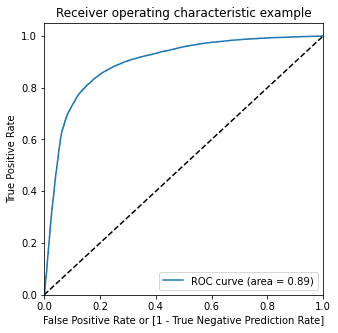

In [123]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.654705,1,1,1,1,1,1,1,1,0,0,0
1,0,0.112305,0,1,1,0,0,0,0,0,0,0,0
2,0,0.431297,0,1,1,1,1,1,0,0,0,0,0
3,0,0.000248,0,1,0,0,0,0,0,0,0,0,0
4,0,0.088350,0,1,0,0,0,0,0,0,0,0,0


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.677119     0.977731     0.376508
0.2          0.2  0.740587     0.950748     0.530426
0.3          0.3  0.781604     0.922057     0.641152
0.4          0.4  0.810399     0.891812     0.728986
0.5          0.5  0.826143     0.849138     0.803149
0.6          0.6  0.826868     0.791703     0.862033
0.7          0.7  0.810606     0.711430     0.909783
0.8          0.8  0.748641     0.548760     0.948521
0.9          0.9  0.600808     0.220364     0.981252


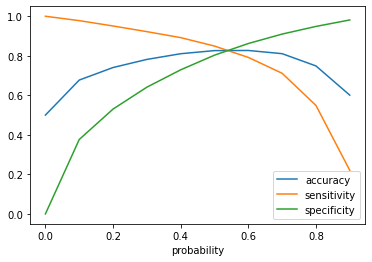

In [126]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6.<br> So lets tweak a little more within this range.**

In [127]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.654705,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
1,0,0.112305,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.431297,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.000248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.088350,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [128]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.826143     0.849138     0.803149
0.51         0.51  0.826376     0.843182     0.809571
0.52         0.52  0.827283     0.837899     0.816666
0.53         0.53  0.828163     0.832669     0.823657
0.54         0.54  0.827749     0.826299     0.829199
0.55         0.55  0.827283     0.820032     0.834533
0.56         0.56  0.827412     0.815371     0.839453
0.57         0.57  0.828474     0.811332     0.845616
0.58         0.58  0.827723     0.804392     0.851054
0.59         0.59  0.826998     0.798022     0.855974


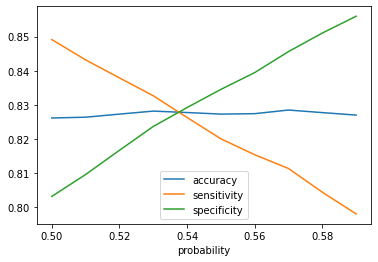

In [129]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variable converges at `0.54`**

In [130]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.654705,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1
1,0,0.112305,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.431297,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.000248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.088350,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8277487182143042


In [132]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16011  3298]
 [ 3354 15955]]


In [133]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8262986172251282
Specificity =  0.8291988192034803
False Positive Rate =  0.17080118079651976
Precision =  0.8287020204643433
True Negative Prediction Rate =  0.8268009295120062


#### Precision and recall tradeoff

In [134]:
from sklearn.metrics import precision_recall_curve

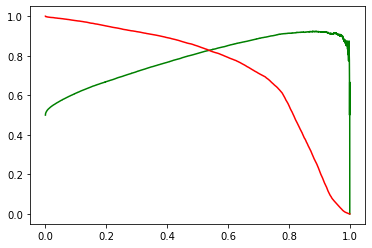

In [135]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

**Transforming and feature selection for test data**

In [136]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Overall_rech_amt_data_6,Overall_rech_amt_data_7,av_amt_rech_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12Months,tenure_range_1-2yrs,tenure_range_2-5yrs,tenure_range_5 yrs above
20296,0.018477,0.002157,0.000675,0.000743,0.006486,0.001537,0.001596,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000546,0.000448,0.000743,0.009510,0.000968,0.002820,0.002442,0.001262,0.002873,0.000111,0.000000,0.000000,0.004893,0.001221,0.002146,0.000560,0.002899,0.000000,0.001760,0.002139,0.001027,0.000476,0.0,0.001251,0.002678,0.003942,0.000000,0.000000,0.0,0.006690,0.002092,0.002383,0.001945,0.001270,0.000659,0.010895,0.007762,0.004531,0.005231,0.007821,0.014454,0.009180,0.009359,0.008659,0.005209,0.000000,0.000000,0.001730,0.000487,0.000645,0.004041,0.000000,0.000000,0.007680,0.000251,0.000611,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088235,0.091667,0.020408,0.029925,0.037406,0.032367,0.007481,0.037406,0.032367,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0000,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012876,0.013321,0.006719,0.040021,0,0,0,1,0,0,0,1,0,0
8279,0.012510,0.002153,0.001144,0.000880,0.003182,0.002207,0.000254,0.002225,0.0,0.001166,0.00123,0.003656,0.000948,0.001227,0.000134,0.000269,0.000235,0.000891,0.000016,0.000000,0.000000,0.000000,0.070329,0.017483,0.007759,0.000847,0.000672,0.000270,0.000000,0.000000,0.000000,0.000000,0.000499,0.000723,0.000161,0.0,0.024785,0.005878,0.003483,0.000000,0.000000,0.0,0.003615,0.001794,0.000567,0.005846,0.011059,0.001444,0.000064,0.002891,0.000469,0.000000,0.000000,0.000000,0.003462,0.009919,0.001477,0.000661,0.000000,0.003738,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,0.000661,0.000019,0.002704,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036765,0.141667,0.035714,0.007481,0.006234,0.006743,0.004239,0.003491,0.000000,0.05,0.010932,0.016077,0.016077,0.018468,0.021740,0.043988,0.015708,0.000000,0.000000,0.0,0.00,0.0,0.0,0.047619,0.1875,0.0,0.0000,0.0,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.002575,0.028373

In [137]:
# Feature selection
X_test=X_test[rfe_columns_3]
X_test.head()

,roam_og_mou_7,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
20296,0.000000,0.002820,0.001027,0.002383,0.010895,0.014454,0.008659,0.000611,0.0,0.020408,0.032367,0.00,0.000000,0.000000,0.0,0.000000,0.040021
8279,0.003656,0.000016,0.000723,0.000567,0.000064,0.000000,0.001477,0.002704,0.0,0.035714,0.000000,0.05,0.016077,0.015708,0.0,0.000000,0.027762
72269,0.000000,0.130753,0.016124,0.078679,0.075160,0.008933,0.076430,0.007992,0.0,0.040816,0.029220,0.00,0.000000,0.000000,0.0,0.000000,0.045642
65602,0.000000,0.032251,0.010388,0.024089,0.050771,0.001278,0.033921,0.000962,0.0,0.117347,0.006743,0.00,0.000000,0.000000,0.0,0.000000,0.037979
42758,0.000000,0.000516,0.035260,0.000915,0.056139,0.000000,0.004034,0.000000,0.0,0.010204,0.000000,0.00,0.000000,0.000000,0.0,0.001456,0.038944


In [138]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

**Predicting the target variable**

In [139]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 20296    0.707252
8279     0.555704
72269    0.044054
65602    0.359618
42758    0.915396
80210    0.080261
67925    0.238313
25034    0.066608
10422    0.069802
43140    0.193912
dtype: float64


In [140]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
20296,0.707252
8279,0.555704
72269,0.044054
65602,0.359618
42758,0.915396


In [141]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [142]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
20296,1
8279,1
72269,0
65602,0
42758,1


In [143]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
20296,1,0.707252
8279,1,0.555704
72269,0,0.044054
65602,0,0.359618
42758,1,0.915396


In [144]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
20296,1,0.707252,1
8279,1,0.555704,1
72269,0,0.044054,0
65602,0,0.359618,0
42758,1,0.915396,1


In [145]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8363515164981669

In [146]:
print("The accuracy of the test data set is : 0.836 , i.e 83.6%")

The accuracy of the test data set is : 0.836 , i.e 83.6%


### Metrics Evaluation

In [147]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6926 1325]
 [ 148  602]]


In [148]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8026666666666666
Specificity =  0.8394134044358259
False Positive Rate =  0.16058659556417404
Precision =  0.3124026984950701
True Negative Prediction Rate =  0.9790783149561776


### Explaining the result

In [150]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  84.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



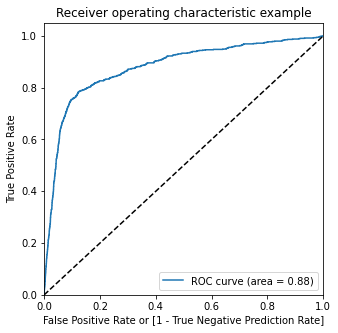

In [151]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

**The AUC score for train dataset is 0.90 and the test dataset is 0.87.<br> This model can be considered as a good model.**

#### Conclusion: 
Final logistic regression model is built with 15 features for high value customers.
<br><br>
A cut-off probability is used to predict the customer will churn or not which is 0.54. <br><br>
The customers who have predicted probability of 0.54 and more are most likely to churn. <br><br>
The final model has sensitivity of 80% which means 80% of the predicted churns are true churns.<br><br>
Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.